In [16]:
import numpy as np
import pandas as pd


In [10]:

movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:

movie_titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.8+ KB
Unique items: 1682
Unique users: 943


In [12]:

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep = "\t", names=column_names)

df.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:

final_df = pd.merge(df,movie_titles, on='item_id')

final_df.head()




,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [14]:
print("Unique items:", final_df['item_id'].nunique())
print("Unique users:", final_df['user_id'].nunique())

Unique items: 1682
Unique users: 943


# For each title get an average rating and show in descending order

In [22]:
final_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

# How many people given these ratings?

In [23]:
final_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

# 1Lets store both in new dataframe

In [26]:
ratings = pd.DataFrame(final_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
ratings['num of ratings'] = pd.DataFrame(final_df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [28]:
import matplotlib.pyplot as plt

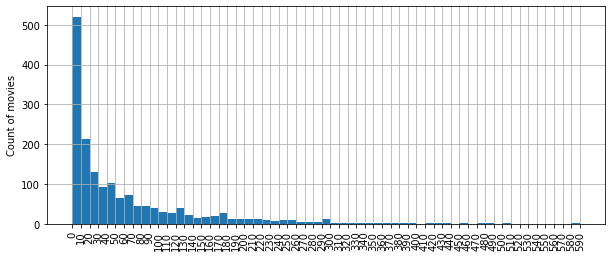

In [30]:
plt.figure(figsize=(10,4))
b = np.arange(0,600,10)
ratings['num of ratings'].hist(bins=b)
plt.xticks(b, rotation=90)
plt.ylabel('Count of movies')
plt.show()
# this graph says x axis user who gave the respective number of rating in y axis

# examplebetween 1 to 10 users have give rating  more than  550 movies

In [31]:
np.sum(ratings['num of ratings']==1)
# how many ppl have rate a movie

134

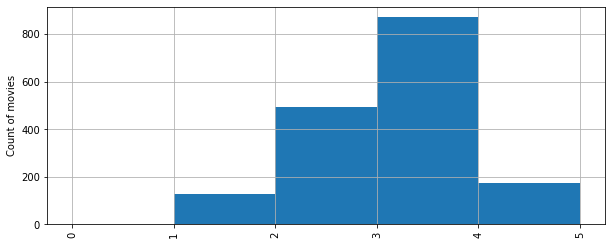

In [32]:
plt.figure(figsize=(10,4))
b = np.arange(0,6)
ratings['rating'].hist(bins=b)
plt.xticks(b, rotation=90)
plt.ylabel('Count of movies')
plt.show()

In [33]:
ratings.sort_values(by=['num of ratings','rating'], 
                    ascending=[False, False]).head(25)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431
